In [116]:
import importlib
import utils
import visualization

importlib.reload(utils)
importlib.reload(visualization)
%reload_ext autoreload
%autoreload 2
from utils import *
from visualization import visualize, graficar_distribucion_productos
pd.set_option('display.max_colwidth', None)


In [117]:
excel_path = "/home/viktoria/Downloads/ARBOLES ALIMENTOS EJERCICIO KABELLI.xlsx"
# all data
df_all = load_all_sheets(excel_path)
print("Number os samples in the dataset:", df_all.shape[0])

Number os samples in the dataset: 2381


### Busqueda de los productos iguales que tienen SKU iguales en las diferentes subempresas

In [118]:
data = load_all_sheets(excel_path)

correct_products = find_similar_products(data, 88, different_sku=False)
correct_products = correct_products.copy()
correct_products = remove_flavor_variants(correct_products)
columns_to_show = [col for col in correct_products.columns if col not in ['Numbers 1', 'Numbers 2']]
correct_products = correct_products.loc[:, columns_to_show]
exact_matches = correct_products[correct_products['Similarity'] == 100]
partial_matches = correct_products[correct_products['Similarity'] < 100]

In [119]:
# Los productos que tienen nombres iguales y SKU iguales
same_name_same_sku = exact_matches.shape[0]
print(same_name_same_sku)

264


In [120]:
exact_matches.head(5)

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity
0,CASTANO,PAN DE PASCUA 500 GR CLASICO CASTANO,21720,Surtiventas Arbol_24_25,PAN DE PASCUA 500 GR CLASICO CASTANO,21720,Prisur Arbol_24_25,100
1,LUCHETTI,SEMOLA 250 GR. LUCCHETTI,74627,Surtiventas Arbol_24_25,SEMOLA 250 GR. LUCCHETTI,74627,Prisur Arbol_24_25,100
2,LOS CHINOS,ARROZ 1 KG. GRADO 2 LOS CHINOS,78183,Prinorte Arbol_24_25,ARROZ 1 KG. GRADO 2 LOS CHINOS,78183,Prisur Arbol_24_25,100
3,VITELLI,SOPA INST. 65 GR SABOR POLLO VITELLI,72472,Surtiventas Arbol_24_25,SOPA INST. 65 GR SABOR POLLO VITELLI,72472,Prisur Arbol_24_25,100
4,VITELLI,SOPA INST. 65 GR SABOR CARNE VITELLI,72472,Surtiventas Arbol_24_25,SOPA INST. 65 GR SABOR CARNE VITELLI,72472,Prisur Arbol_24_25,100


In [121]:
# Los productos que tienen nombres parecidos pero no iguales, SKU son iguales
similar_name_same_sku = partial_matches.shape[0]
print(similar_name_same_sku)

216


In [122]:
partial_matches.head(5)

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity
264,GOURMET,ESCENCIA DE PAN DE PASCUA 60 CC GOURMET,41077,Surtiventas Arbol_24_25,ESENCIA DE PAN DE PASCUA 60 CC GOURMET,41077,Prisur Arbol_24_25,99
265,GOURMET,CONDIMENTO CANELA ENTERA 15 GR X 50 UN GOURMET,41022,Surtiventas Arbol_24_25,CONDIMENTO CANELA ENTERA 15 GR X 50 UND GOURMET,41022,Prisur Arbol_24_25,99
266,VIVO,JUGO NATURAL 190 ML VIVO PI¥A DP/3 UND,44103,PRISA Arbol_24_25,JUGO NATURAL 190 ML VIVO PINA DP/3 UND,44103,Prinorte Arbol_24_25,99
267,LIV,AGUA MINERAL LIV 500 ML S/GAS X 12 UN,43738,Surtiventas Arbol_24_25,AGUA MINERAL LIV 500 ML S/GAS X 12 UND,43738,Prisur Arbol_24_25,99
268,SVELTY,LECHE EN POLVO 800 GR. SVELTY DESCRE. SOFTPACK,88276,PRISA Arbol_24_25,LECHE EN POLVO 800 GR SVELTY DESCR. SOFTPACK,88276,Prinorte Arbol_24_25,99


### Busqueda de los productos iguales que tienen diferentes SKU

In [123]:
#Busqueda de los productos iguales que tienen diferentes SKU

In [124]:
excel_path = "/home/viktoria/Downloads/ARBOLES ALIMENTOS EJERCICIO KABELLI.xlsx"

confident, needs_review = process_excel_for_duplicates(
    excel_path,
    confidence_threshold=93,
    low_confidence_threshold=88
)


In [125]:
different_sku_conf = confident.shape[0]
different_sku_conf

58

In [126]:
different_sku_review = needs_review.shape[0]
different_sku_review

35

In [127]:
confident.head(5)

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity,Numbers 1,Numbers 2
0,COLISEO,ATUN DESMENUZADO AGUA 170 GR COLISEO,75969,Surtiventas Arbol_24_25,ATUN DESMENUZADO AGUA 170 GR COLISEO,85102,Prisur Arbol_24_25,100,[170.0],[170.0]
1,COLISEO,AZUCAR 1 KG COLISEO,22960,Surtiventas Arbol_24_25,AZUCAR 1 KG. COLISEO,71978,Prisur Arbol_24_25,100,[1.0],[1.0]
2,COLISEO,ATUN DESMENUZADO AGUA 170 GR COLISEO,97840,PRISA Arbol_24_25,ATUN DESMENUZADO AGUA 170 GR COLISEO,85102,Prisur Arbol_24_25,100,[170.0],[170.0]
3,COLISEO,ATUN DESMENUZADO AGUA 170 GR COLISEO,97840,PRISA Arbol_24_25,ATUN DESMENUZADO AGUA 170 GR COLISEO,75969,Surtiventas Arbol_24_25,100,[170.0],[170.0]
4,BELMONT,ACEITE COCINA 250 CC. VEGETAL BELMONT,79094,Prinorte Arbol_24_25,ACEITE COCINA 250 CC. VEGETAL BELMONT,19256,Prisur Arbol_24_25,100,[250.0],[250.0]


In [128]:
needs_review.head(5)
# Aparecen poductos que ya pueden ser diferentes como
#CEREAL BARRA COSTA FRUTOS ROJOS + YOGURT X 20 UDS	 -  CEREAL BARRA COSTA FRUTOS ROJOS (No tiene Yogurt)
# SALSA DE SOYA SUAVE 165 CC GOURMET -  SALSA DE SOYA SUAVE 165 CC GOURMET (tiene Sauve)
#	YERBA MATE 250 GR. SUPREMO ARGENTIN -	YERBA MATE 250 GR SUPREMO ARGENTINA NARANJA
# CAFE INST. JUAN VALDEZ 95 GR LIOFILIZADO DESCAFEIN	-  CAFE 95 GR JUAN VALDEZ INST. LIOFILIZADO
# Pero la mayoria son iguales

,Marca,Nombre SKU 1,SKU 1,Sheet 1,Nombre SKU 2,SKU 2,Sheet 2,Similarity,Numbers 1,Numbers 2
0,NESCAFE,CAFE INST. NESCAFE TRADICION 400 GR POLVO TARRO,12596,PRISA Arbol_24_25,CAFE 400 GR NESCAFE TRADICIONAL POLVO TARRO,89295,Prisur Arbol_24_25,92,[400.0],[400.0]
1,ALOE WIN,BEBIDA ALOE WIN 500 CC ALOE VERA MANGO,12566,PRISA Arbol_24_25,BEBIDA ALOE VERA 500 ML MANGO ALOE WIN,72475,Prisur Arbol_24_25,92,[500.0],[500.0]
2,COLISEO,FIDEO 400 GR SPAGUETTI COLISEO SPECIALE,54052,Surtiventas Arbol_24_25,PASTA FIDEO 400 GR COLISEO SPAGUETTI SPECIAL,72501,Prisur Arbol_24_25,92,[400.0],[400.0]
3,LUCCHETTI,FIDEO 400 GR TALLARIN 77 LUCCHETTI,24295,Surtiventas Arbol_24_25,PASTA FIDEO 400 GR LUCCHETTI TALLARIN 77,75555,Prisur Arbol_24_25,92,"[400.0, 77.0]","[400.0, 77.0]"
4,COSTA,CEREAL BARRA COSTA FRUTOS ROJOS + YOGURT X 20 UDS,36035,PRISA Arbol_24_25,CEREAL BARRA COSTA FRUTOS ROJOS X 20 UDS,75263,Prisur Arbol_24_25,92,[20.0],[20.0]


In [129]:
confident.to_excel("confident_matches.xlsx", index=False)
needs_review.to_excel("needs_review_matches.xlsx", index=False)

In [130]:

filtered= find_normal_cases(excel_path)
filtered = filtered.rename(columns={"Sheet": "Subempresa"})
filtered_count = filtered.shape[0]

In [131]:
# En las estadísticas se muestra el número de coincidencias, no el de productos únicos.

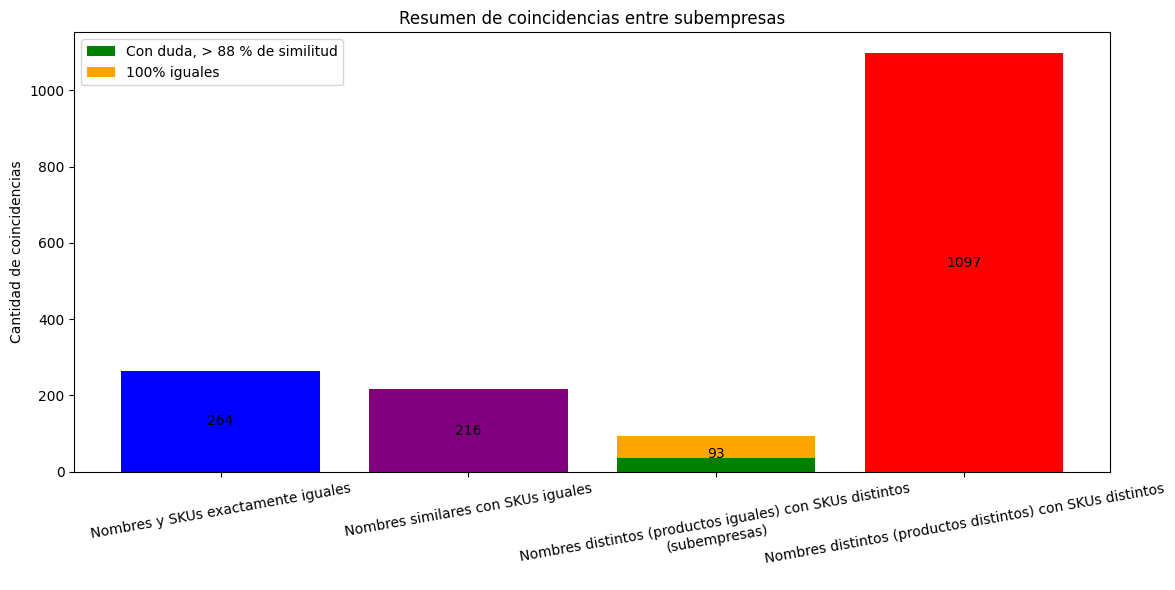

In [132]:
visualize(different_sku_review, different_sku_conf, same_name_same_sku, similar_name_same_sku, filtered_count)


In [133]:
# Calculamos cuántos productos se repiten en 2, 3 o 4 empresas.
output_needs_review = count_unique_subempresas_per_product(needs_review)
output_confident = count_unique_subempresas_per_product(confident)
output_exact = count_unique_subempresas_per_product(exact_matches)
output_partial = count_unique_subempresas_per_product(partial_matches)
needs_review_stats = count_product_distribution_dict_only(output_needs_review)
confident_stats = count_product_distribution_dict_only(output_confident)
exact_matches_stats = count_product_distribution_dict_only(output_exact)
partial_matches_stats= count_product_distribution_dict_only(output_partial)


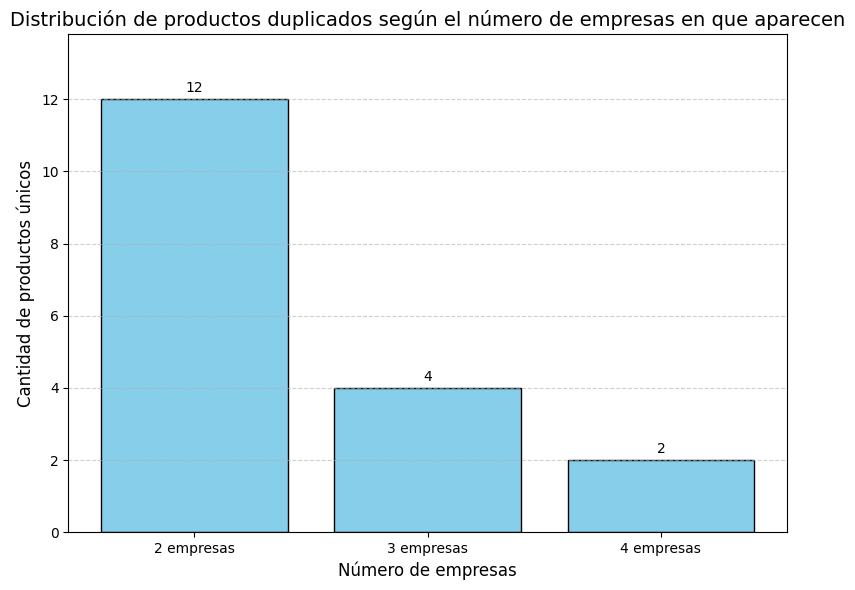

In [139]:
# Nombres distintos (productos iguales) con SKUs distintos (los casos que necesitan la revisión)
# Si por ejemplo hay producto que tiene 2 parecidos por nombres en 2 otras esmpresas todos sus 3 variaciones se cuentan como solo uno producto

graficar_distribucion_productos(needs_review_stats)

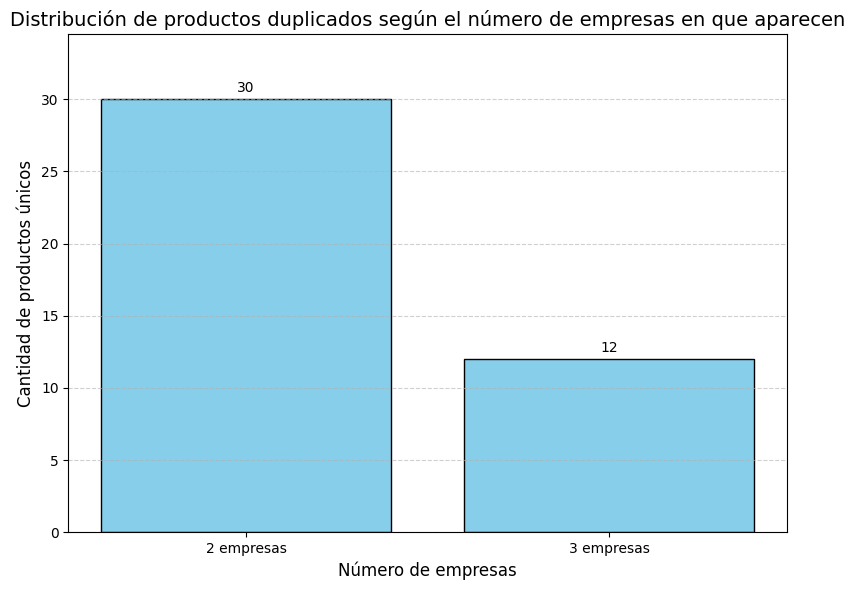

In [140]:
#Nombres distintos (productos iguales) con SKUs distintos (los casos seguros)
graficar_distribucion_productos(confident_stats)


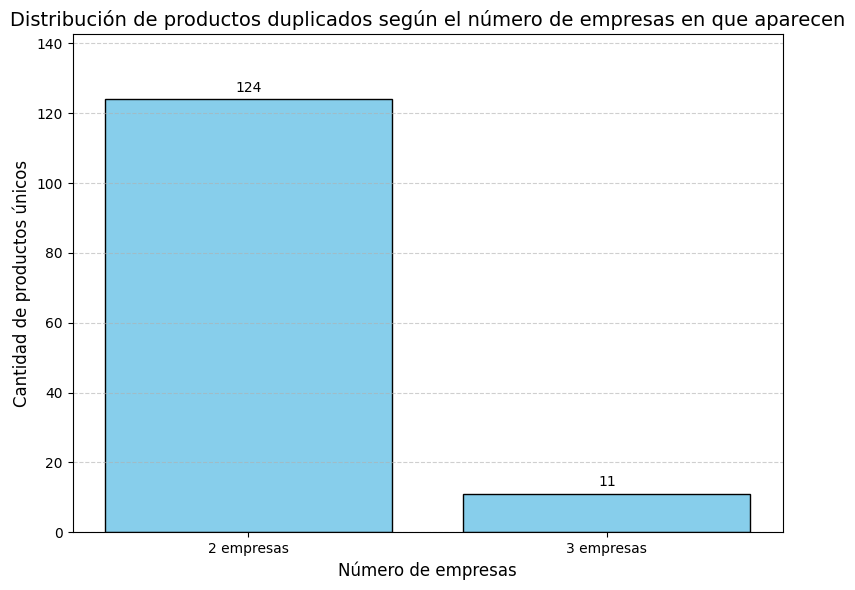

In [141]:
# Nombres y SKUs exactamente iguales'
graficar_distribucion_productos(exact_matches_stats)

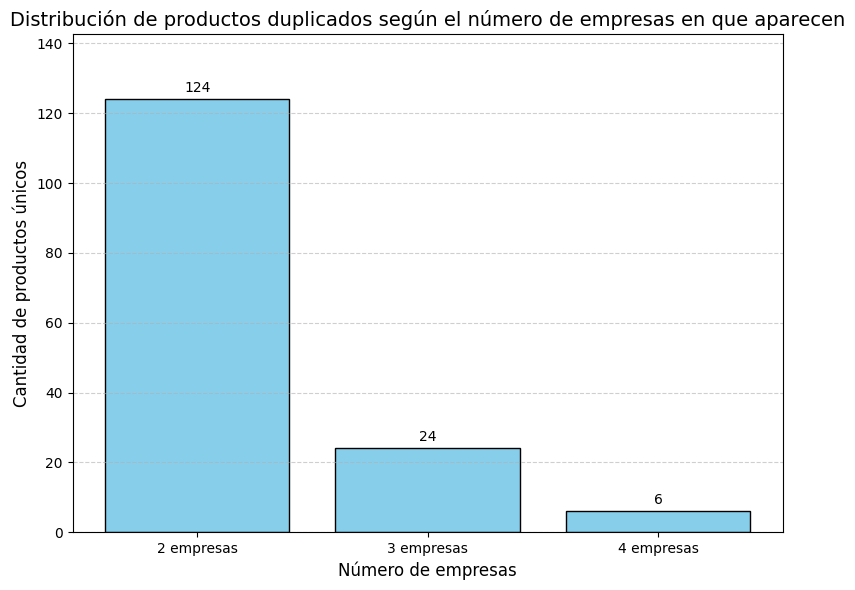

In [142]:
# Nombres similares con SKUs iguales
graficar_distribucion_productos(partial_matches_stats)